In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/auto-mpg/auto-mpg.csv


In [37]:
data = pd.read_csv('../input/auto-mpg/auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [38]:
data = data.drop('car name', axis = 1)

In [39]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [40]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [41]:
# to avoid dealing with label encoding priority problem
data['origin'] = data['origin'].replace({1:'America', 2:'Europe', 3:'Asia'})

In [42]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,America
1,15.0,8,350.0,165,3693,11.5,70,America
2,18.0,8,318.0,150,3436,11.0,70,America
3,16.0,8,304.0,150,3433,12.0,70,America
4,17.0,8,302.0,140,3449,10.5,70,America


In [43]:
data = pd.get_dummies(data, prefix='Origin', columns = ['origin'])
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,Origin_America,Origin_Asia,Origin_Europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


In [44]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,Origin_America,Origin_Asia,Origin_Europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [45]:
# horsepower has number value but column type is still object i.e. its categorical

# processing this column
# finding where is the numbers not present
hp_isdigit = pd.DataFrame(data.horsepower.str.isdigit())
data[hp_isdigit['horsepower'] == False]
# in column horse power missing value are detected 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,Origin_America,Origin_Asia,Origin_Europe
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [46]:
# now replacing these missing values
data = data.replace('?',np.nan)
data[hp_isdigit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,Origin_America,Origin_Asia,Origin_Europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,0,0


In [47]:
medianfiller = lambda x:x.fillna(x.median()) # using lambda we can now create a funvtion wihich will fill the nan with median
# .fillna is used to replace nan with median 
data = data.apply(medianfiller,axis=0) # applying changes here
# replace is not used because fillna is more granting that it will replace the values


In [48]:
data['horsepower'] = data['horsepower'].astype('float64')

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cylinders       398 non-null    int64  
 2   displacement    398 non-null    float64
 3   horsepower      398 non-null    float64
 4   weight          398 non-null    int64  
 5   acceleration    398 non-null    float64
 6   model year      398 non-null    int64  
 7   Origin_America  398 non-null    uint8  
 8   Origin_Asia     398 non-null    uint8  
 9   Origin_Europe   398 non-null    uint8  
dtypes: float64(4), int64(3), uint8(3)
memory usage: 23.1 KB


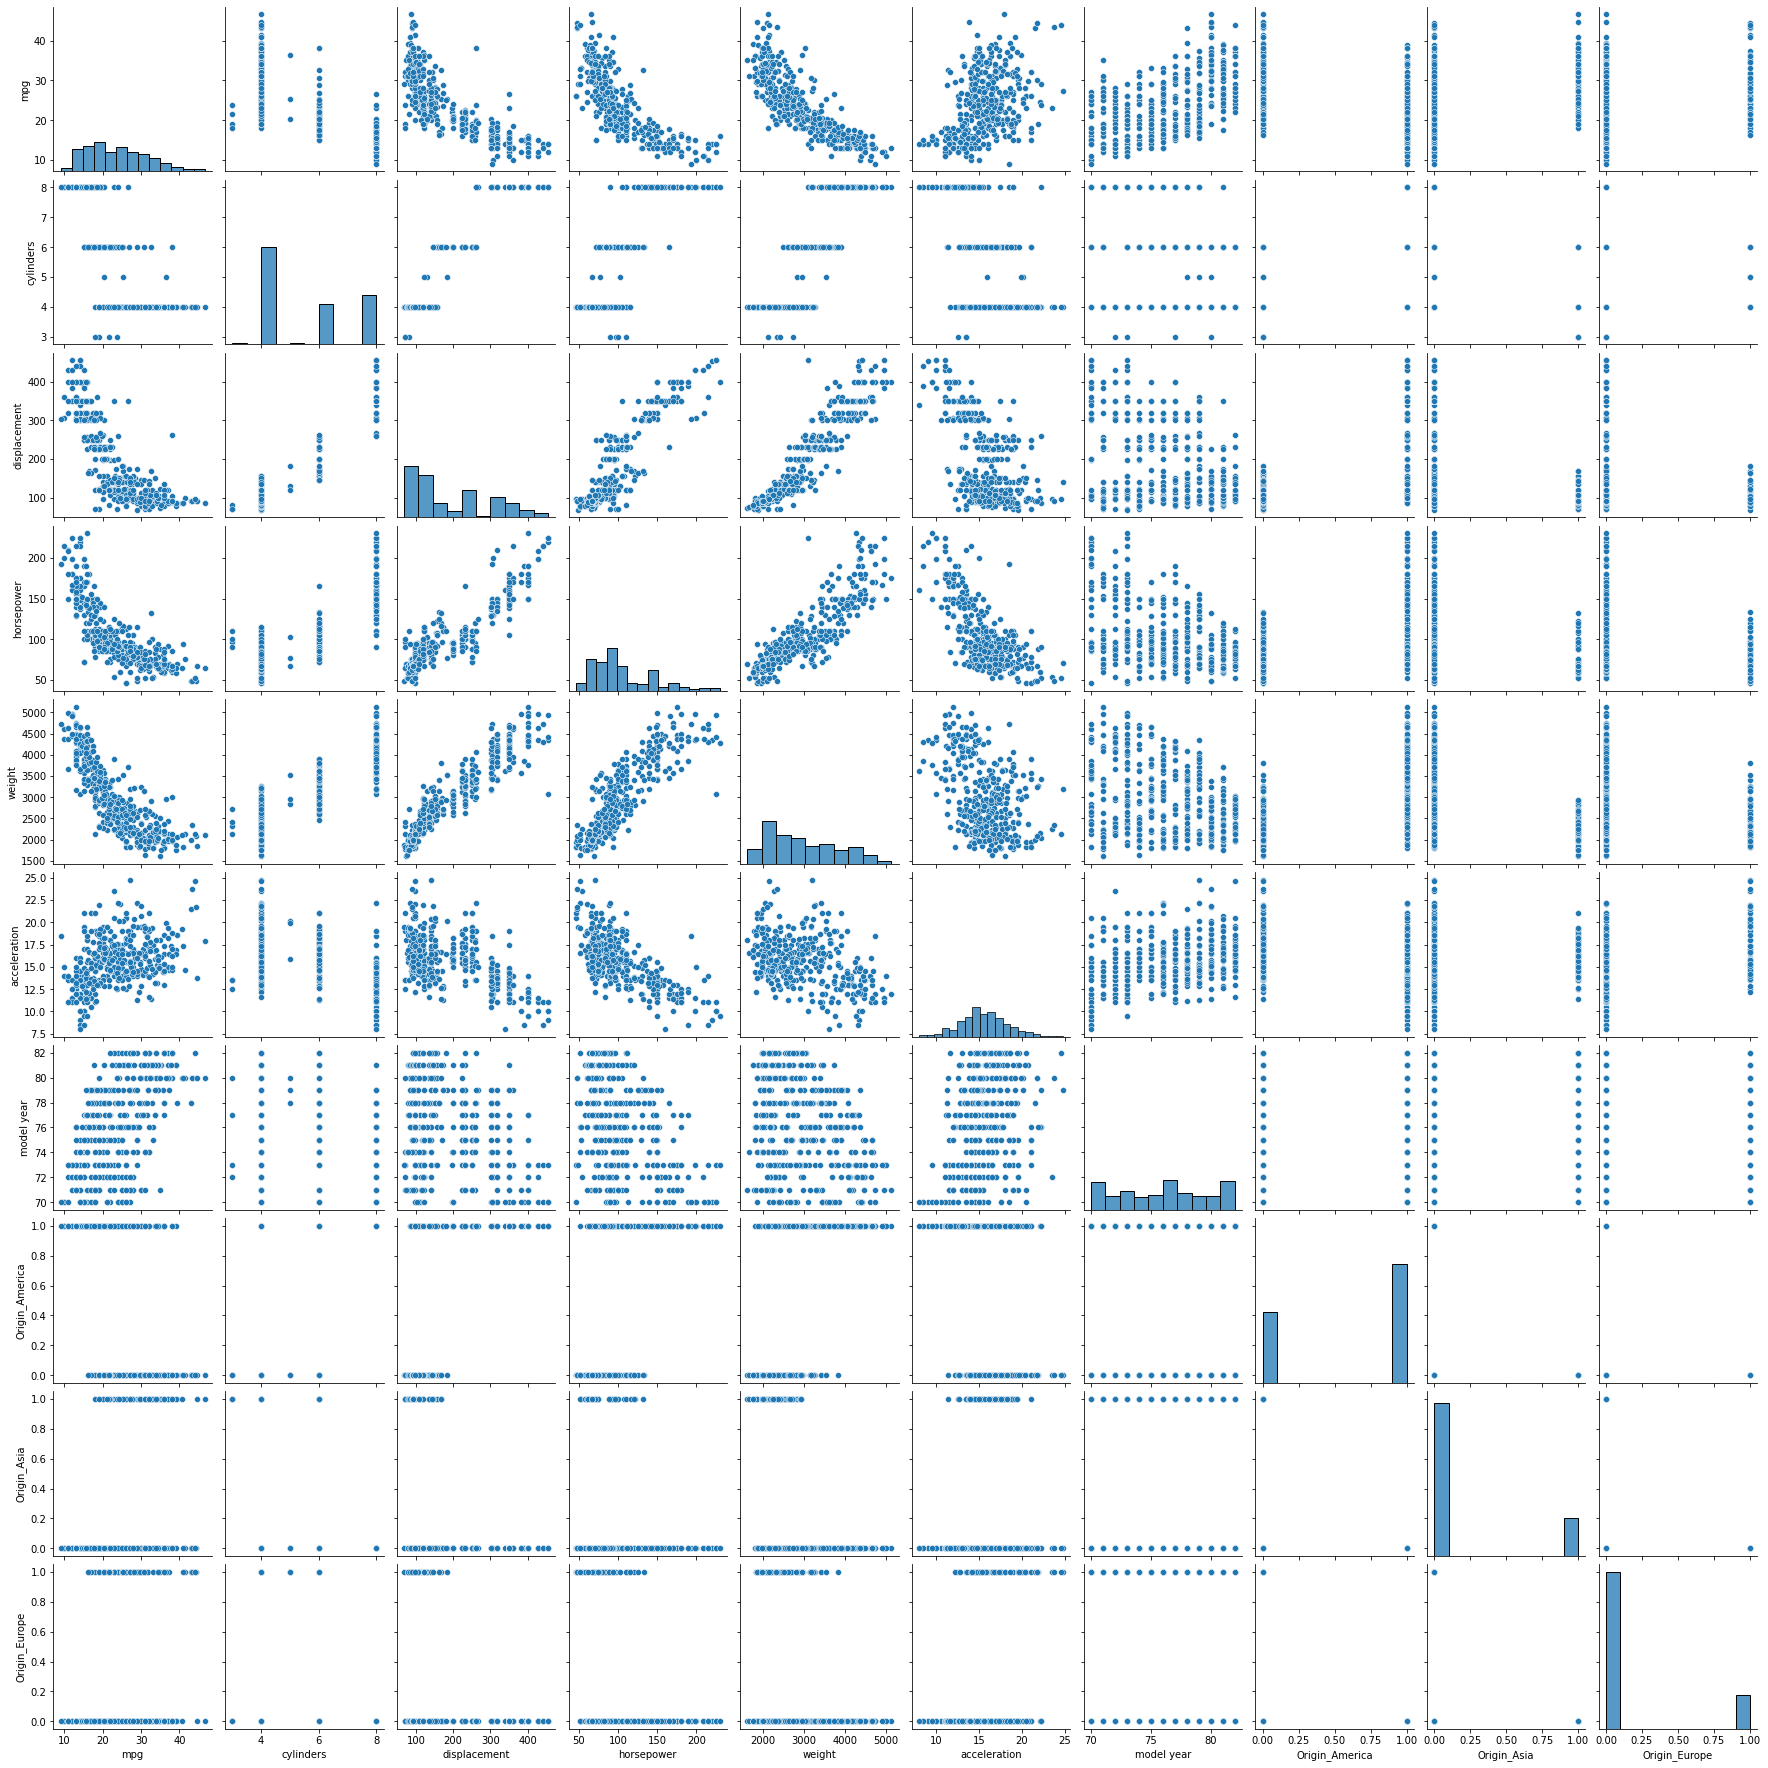

In [50]:
sns.pairplot(data)
# mpg and other and not that linear but still can be captured small amount 

In [51]:
# to start bulding we need to spereat as dependent(y) and independent data(x)
y = data['mpg']
x = data.drop(['mpg','Origin_Europe'],axis = 1) # when we know origin america and origin aisa we can drop origin europe
# as they are very closly related to each other

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=1)# 70 % go to train 30 % go to test
# in train split function we have to give what our x and y is 

# now fitting the linear model
regression_model = LinearRegression()

In [67]:
regression_model.fit(x_train, y_train)

LinearRegression()

In [86]:
# itreating through columns of training data
for idex,col_name in enumerate(x_train.columns):
    print("The coff of", col_name,"is", regression_model.coef_[idex])
    

The coff of cylinders is -0.39480796616482383
The coff of displacement is 0.02894551076548718
The coff of horsepower is -0.021752207723546777
The coff of weight is -0.007352032065147351
The coff of acceleration is 0.061919366007618756
The coff of model year is 0.836933891764499
The coff of Origin_America is -3.001283000918514
The coff of Origin_Asia is -0.6060179643247368


In [87]:
# rsquare score in sample and out sample score
regression_model.score(x_test,y_test)# outsample

0.8433135132808833

In [88]:
regression_model.score(x_train,y_train)# insample

# anything above 75 score is accepted
# if its below 75 then we go and redo the model with including or excluding some attribute


0.8141025501610559